# Exploring SVK Mimer "API" for actuall energy production

## Initial query and CSV parsing testing

In [2]:
# Carl vRJ 2019-04-06
import pandas as pd
import numpy as np
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)


csv_url_string = "https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=03%2F30%2F2019%2000%3A00%3A00&PeriodTo=04%2F06%2F2019%2010%3A10%3A55&ConstraintAreaId=SN0&ProductionSortId=VI"

test = pd.read_csv(csv_url_string,sep=';',parse_dates=True,decimal=',') # 

test.head()

,Period,Planerad (kWh),Avräknad (kWh),Publiceringstidpunkt,Unnamed: 4
0,2019-03-30 00:00,NaN,4975408.173,2019-04-05 10:01,NaN
1,2019-03-30 01:00,NaN,4718669.599,2019-04-05 10:01,NaN
2,2019-03-30 02:00,NaN,4402917.724,2019-04-05 10:01,NaN
3,2019-03-30 03:00,NaN,4199060.526,2019-04-05 10:01,NaN
4,2019-03-30 04:00,NaN,4141460.816,2019-04-04 14:01,NaN


In [2]:
test['Avräknad (kWh)'].head()

0    4975408.173
1    4718669.599
2    4402917.724
3    4199060.526
4    4141460.816
Name: Avräknad (kWh), dtype: float64

## Digging deeper and finding different power production sources

In [3]:
solar = 'SE' # Solarpower
wind = 'VI'  # Onshore windpower
hydro = 'VA' # Hydropower
nucle = 'KK'  # Nuclearpower
wave = 'VK'  # Wavepower
gas = 'GA'   # Gasturbine/Disel 
heat = 'OK'  # Other heat power
other = 'OP' # Other production


date_from = '01%2F01%2F2019%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '04%2F05%2F2019%2023%3A59%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', solar])
print(csv_url_string)
test = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
test.head()

https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=01%2F01%2F2019%2000%3A00%3A00&PeriodTo=04%2F05%2F2019%2023%3A59%3A00&ConstraintAreaId=SN0&ProductionSortId=SE


,Period,Planerad (kWh),Avräknad (kWh),Publiceringstidpunkt,Unnamed: 4
0,2019-01-01 00:00,NaN,176.113,2019-02-26 17:00,NaN
1,2019-01-01 01:00,NaN,180.390,2019-02-26 17:00,NaN
2,2019-01-01 02:00,NaN,180.313,2019-02-26 17:00,NaN
3,2019-01-01 03:00,NaN,177.250,2019-02-26 17:00,NaN
4,2019-01-01 04:00,NaN,167.935,2019-02-26 17:00,NaN


## Find max value of Solar 2019

Max solar power 2019 is 108.76 MWh during 2019-02-26 12:00


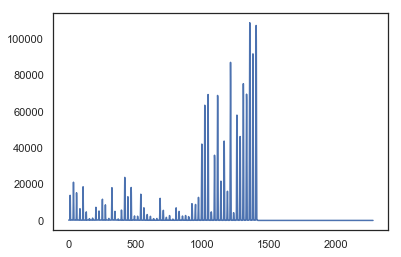

In [4]:
m = test['Avräknad (kWh)'].idxmax()
mwh = format(test['Avräknad (kWh)'][m]/1000,'.2f') # MWh
print('Max solar power 2019 is ' + str(mwh) + ' MWh during ' + str(test['Period'][m]))
plt.plot(test['Avräknad (kWh)'])
plt.show()

## Find Max value 2018

https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=01%2F01%2F2018%2000%3A00%3A00&PeriodTo=01%2F01%2F2019%2000%3A00%3A00&ConstraintAreaId=SN0&ProductionSortId=SE
Max solar power 2018 is 149.05 MWh at 2018-07-01 12:00


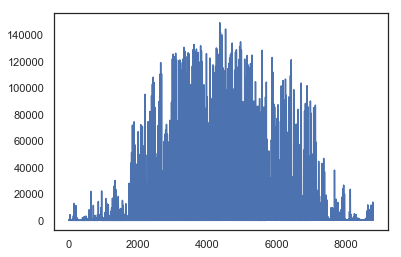

In [5]:
date_from = '01%2F01%2F2018%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '01%2F01%2F2019%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', solar])
print(csv_url_string)
solar_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)

m = solar_2018['Avräknad (kWh)'].idxmax()
mwh = format(solar_2018['Avräknad (kWh)'][m]/1000,'.2f') # MWh

print('Max solar power 2018 is ' + str(mwh) + ' MWh at ' + str(solar_2018['Period'][m]))
plt.plot(solar_2018['Avräknad (kWh)'])
plt.show()

## Solar power production Feb 2018 vs Feb 2019

In [6]:
date_from = '02%2F01%2F2018%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '03%2F01%2F2018%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', solar])


solar_feb_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
m_18 = solar_feb_2018['Avräknad (kWh)'].idxmax()
mwh_2018 = format(solar_feb_2018['Avräknad (kWh)'][m_18]/1000,'.3f') # MWh

date_from = '02%2F01%2F2019%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '03%2F01%2F2019%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', solar])


solar_feb_2019 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
m_19 = solar_feb_2019['Avräknad (kWh)'].idxmax()
mwh_2019 = format(solar_feb_2019['Avräknad (kWh)'][m_19]/1000,'.3f') # MWh

print('Max 2018 ' + str(mwh_2018) + ' MWh, Max 2019 ' + str(mwh_2019) + ' MWh')
print(format(solar_feb_2019['Avräknad (kWh)'].sum()/solar_feb_2018['Avräknad (kWh)'].sum(),'.3f') + ' more total solar power production in feb 2019 vs 2018')

Max 2018 30.110 MWh, Max 2019 108.763 MWh
3.647 more total solar power production in feb 2019 vs 2018


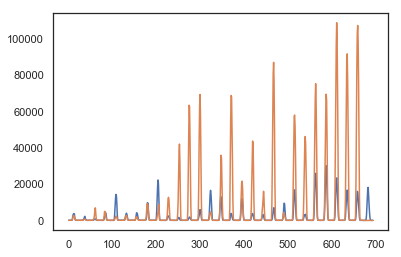

In [7]:
plt.plot(solar_feb_2018['Avräknad (kWh)'])
plt.plot(solar_feb_2019['Avräknad (kWh)'])
plt.show()

## Wind power 2016-2019

In [8]:
date_from = '01%2F01%2F2016%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '04%2F01%2F2019%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', wind])
wind_data = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)

wm = wind_data['Avräknad (kWh)'].idxmax()
w_mwh = format(wind_data['Avräknad (kWh)'][wm]/1000,'.3f') # MWh
print('Max Wind power is ' + str(w_mwh) + ' MWh at ' + str(wind_data['Period'][wm]))

Max Wind power is 6037.356 MWh at 2019-03-23 15:00


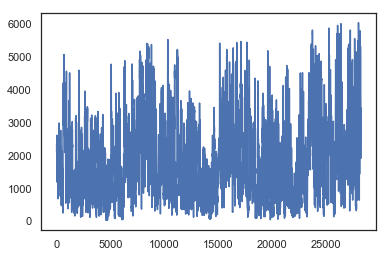

In [9]:
plt.plot(wind_data['Avräknad (kWh)']/1000)
plt.show()

## Total energy production in Sweden 2018

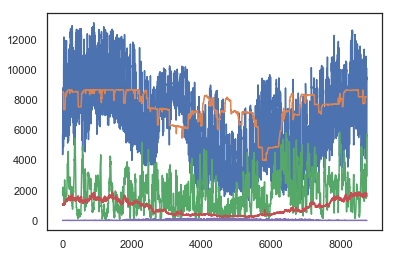

In [10]:
solar = 'SE' # Solarpower
wind = 'VI'  # Onshore windpower
hydro = 'VA' # Hydropower
nucle = 'KK'  # Nuclearpower
wave = 'VK'  # Wavepower, 0.0 2018
gas = 'GA'   # Gasturbine/Disel, 0.0 2018
heat = 'OK'  # Other heat power
other = 'OP' # Other production

date_from = '01%2F01%2F2018%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '12%2F31%2F2018%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', wind])
wind_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', solar])
solar_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', hydro])
hydro_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', nucle])
nucle_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)


csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', heat])
heat_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', other])
other_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)
plt.plot(hydro_2018['Avräknad (kWh)']/1000)
plt.plot(nucle_2018['Avräknad (kWh)']/1000)
plt.plot(wind_2018['Avräknad (kWh)']/1000)
plt.plot(heat_2018['Avräknad (kWh)']/1000)
plt.plot(solar_2018['Avräknad (kWh)']/1000)
plt.show()

In [11]:
tot = solar_2018['Avräknad (kWh)'].sum() + wind_2018['Avräknad (kWh)'].sum() + hydro_2018['Avräknad (kWh)'].sum() + nucle_2018['Avräknad (kWh)'].sum() + heat_2018['Avräknad (kWh)'].sum() + other_2018['Avräknad (kWh)'].sum()
tot/1000000 # GWh

152439.28069521498

In [12]:
solar_2018['Avräknad (kWh)'].sum()/tot*100

0.09681693884470861

In [13]:
wind_2018['Avräknad (kWh)'].sum()/tot*100

10.932027540570191

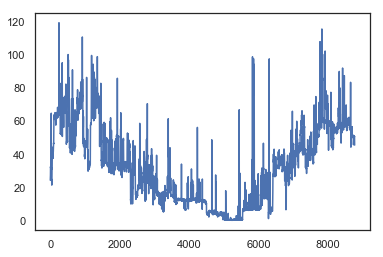

In [14]:
plt.plot(other_2018['Avräknad (kWh)']/1000)
plt.show()

In [15]:
wind_2018['Avräknad (kWh)'].sum()/1000000000 # TWh

16.664704148248003

## Windpower over the years

In [11]:
wind = 'VI'  # Onshore windpower



# 2015
date_from = '01%2F01%2F2015%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '12%2F31%2F2015%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', wind])
wind_2015 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)

# 2016
date_from = '01%2F01%2F2016%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '12%2F31%2F2016%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', wind])
wind_2016 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)


# 2017
date_from = '01%2F01%2F2017%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '12%2F31%2F2017%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', wind])
wind_2017 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)


# 2018
date_from = '01%2F01%2F2018%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss] # / = %2F , : = %3A
date_to = '12%2F31%2F2018%2000%3A00%3A00'#[month '/' day '/' year ' ' hh ':' mm ':' ss]
csv_url_string = ''.join(['https://mimer.svk.se/ProductionConsumption/DownloadText?PeriodFrom=', 
                  date_from, '&PeriodTo=', date_to,
                  '&ConstraintAreaId=SN0&ProductionSortId=', wind])
wind_2018 = pd.read_csv(csv_url_string,sep=';',decimal=',',parse_dates=True)



tot15 = wind_2015['Avräknad (kWh)'].sum()/1000000 # GWh
tot16 = wind_2016['Avräknad (kWh)'].sum()/1000000 # GWh
tot17 = wind_2017['Avräknad (kWh)'].sum()/1000000 # GWh
tot18 = wind_2018['Avräknad (kWh)'].sum()/1000000 # GWh

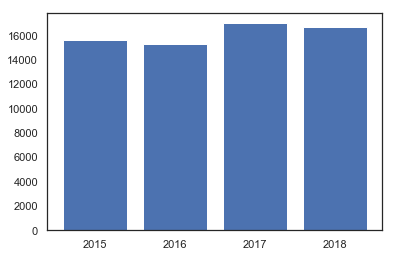

In [12]:
plt.bar(['2015','2016','2017','2018'],[tot15,tot16,tot17,tot18])
plt.show()